In [22]:
# prepare data for lstm
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [42]:
# load dataset
dataset = read_csv('C:/Users/Megaport/JNotebooks/PCK/data/cleaned_2020.csv', header=0, index_col=0)

In [43]:
dataset 

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FC3197,03:FC3199,y
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,780.512,81.377,3.404,3.408,3.401,0.299,41.446,134.946,125.628,NaN,...,1.0,1.0,27.521,36.051,36.309,22.818,320.155,297.566,325.710,943.431
2020-01-01 00:10:00,780.051,81.377,3.401,3.402,3.400,0.298,41.676,135.032,125.583,NaN,...,1.0,1.0,27.212,36.092,36.348,22.865,320.718,297.288,325.425,943.431
2020-01-01 00:20:00,779.416,81.329,3.397,3.403,3.399,0.300,41.762,134.732,125.600,NaN,...,1.0,1.0,27.832,35.906,36.276,22.869,320.184,297.656,325.233,943.073
2020-01-01 00:30:00,780.344,81.250,3.398,3.404,3.398,0.300,41.909,134.521,125.612,NaN,...,1.0,1.0,27.571,35.977,36.262,22.878,319.879,297.386,326.211,943.476
2020-01-01 00:40:00,780.231,81.377,3.403,3.405,3.399,0.298,41.983,134.352,125.703,NaN,...,1.0,1.0,27.194,36.000,36.246,22.850,320.310,297.659,325.206,943.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-06 23:20:00,862.729,82.650,3.382,3.384,3.379,0.297,37.993,130.607,124.263,NaN,...,1.0,1.0,27.722,44.702,45.030,30.674,356.883,324.601,357.439,1038.923
2020-10-06 23:30:00,862.359,82.583,3.385,3.388,3.380,0.296,37.974,130.908,124.410,NaN,...,1.0,1.0,27.573,44.572,44.879,30.450,356.612,323.828,357.975,1038.415
2020-10-06 23:40:00,862.264,82.583,3.386,3.390,3.382,0.296,37.974,131.421,124.375,NaN,...,1.0,1.0,27.246,44.540,44.856,30.450,356.969,324.706,357.074,1038.749


In [44]:
pd.isna(dataset).sum()

03:I3SROE           0
03:T3362            0
03:PI3061A          0
03:PI3061B          0
03:PI3061C          0
03:PD3066           0
03:T3492            0
03:T3358            0
03:TC3550           0
03:TC3550A      40321
03:FV3762           0
03:FC3762           0
03:TC3730           0
03:TV3730A          0
03:TV3730B          0
03:TV3730C          0
03:T3731            0
03:P3649            0
03:P3065            0
03:LC3661           0
03:LI3661A          0
03:LI3661B          0
03:LI3661C          0
03:YV4978       40321
03:FC3075.OP        0
03:FC3075           0
03:T3361            0
03:T3359            0
03:T3360            0
03:N3722_1          0
03:N3721_1          0
03:N3725_1          0
03:E3849            0
03:T3626            0
03:T3627            0
03:T3628            0
03:N3726_1          0
03:E3850            0
03:T3629            0
03:T3630            0
03:T3631            0
03:N3723_1          0
03:N3727_1          0
03:E3851            0
03:T3632            0
03:T3633  

In [45]:
dataset = dataset.drop(columns=['03:YV4978', '03:TC3550A'])

In [46]:
values = dataset.values
values = values.astype('float32')

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [48]:
scaled

array([[0.4409008 , 0.12788081, 0.30096316, ..., 0.44873452, 0.44162297,
        0.44914865],
       [0.4393735 , 0.12788081, 0.29975927, ..., 0.4462843 , 0.43942332,
        0.44914865],
       [0.43726945, 0.12671149, 0.29815412, ..., 0.4495275 , 0.43794155,
        0.44814682],
       ...,
       [0.7117758 , 0.15726256, 0.29374003, ..., 0.6879206 , 0.6836984 ,
        0.7158663 ],
       [0.7149799 , 0.15726256, 0.29374003, ..., 0.68762994, 0.6945269 ,
        0.7204609 ],
       [0.7148938 , 0.15726256, 0.29253614, ..., 0.6844485 , 0.68681645,
        0.7144506 ]], dtype=float32)

In [49]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [50]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.440901   0.127881   0.300963   0.301518   0.303507   0.725491   
2   0.439373   0.127881   0.299759   0.299121   0.303104   0.705883   
3   0.437269   0.126711   0.298154   0.299521   0.302701   0.745099   
4   0.440344   0.124787   0.298555   0.299920   0.302297   0.745099   
5   0.439970   0.127881   0.300562   0.300319   0.302701   0.705883   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var40(t)  var41(t)  \
1   0.328084   0.696382   0.948525    0.485536  ...       1.0       1.0   
2   0.336547   0.699633   0.948488    0.485043  ...       1.0       1.0   
3   0.339711   0.688291   0.948502    0.485251  ...       1.0       1.0   
4   0.345119   0.680314   0.948512    0.485583  ...       1.0       1.0   
5   0.347842   0.673925   0.948588    0.488387  ...       1.0       1.0   

   var42(t)  var43(t)  var44(t)  var45(t)  var46(t)  var47(t)  var48(t)  \
1  0.996735  0.596586  0.595222  0.447870  0.36

In [51]:
values.shape

(40321, 49)

In [59]:
tmp = reframed.iloc[:,:49]

In [67]:
tmp1['var49(t)'] = reframed.iloc[:,-1]

In [69]:
tmp['var49(t)'] = tmp1['var49(t)']

<ipython-input-69-7f99fb1fd911>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['var49(t)'] = tmp1['var49(t)']


In [71]:
reframed = tmp

In [82]:
# split into train and test sets
values = reframed.values
n_train_timestamps = 244 * 144
train = values[:n_train_timestamps, :]
test = values[n_train_timestamps:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35136, 1, 49) (35136,) (5184, 1, 49) (5184,)


In [83]:
test_X.shape

(5184, 1, 49)

Epoch 1/50
488/488 - 1s - loss: 0.0820 - val_loss: 0.1845
Epoch 2/50
488/488 - 0s - loss: 0.0699 - val_loss: 0.1069
Epoch 3/50
488/488 - 0s - loss: 0.0625 - val_loss: 0.0987
Epoch 4/50
488/488 - 0s - loss: 0.0622 - val_loss: 0.0937
Epoch 5/50
488/488 - 0s - loss: 0.0555 - val_loss: 0.1055
Epoch 6/50
488/488 - 0s - loss: 0.0435 - val_loss: 0.0391
Epoch 7/50
488/488 - 0s - loss: 0.0309 - val_loss: 0.0872
Epoch 8/50
488/488 - 0s - loss: 0.0269 - val_loss: 0.0614
Epoch 9/50
488/488 - 0s - loss: 0.0262 - val_loss: 0.0599
Epoch 10/50
488/488 - 0s - loss: 0.0245 - val_loss: 0.0642
Epoch 11/50
488/488 - 0s - loss: 0.0207 - val_loss: 0.0568
Epoch 12/50
488/488 - 0s - loss: 0.0240 - val_loss: 0.0659
Epoch 13/50
488/488 - 0s - loss: 0.0155 - val_loss: 0.0453
Epoch 14/50
488/488 - 0s - loss: 0.0138 - val_loss: 0.0476
Epoch 15/50
488/488 - 0s - loss: 0.0200 - val_loss: 0.0644
Epoch 16/50
488/488 - 0s - loss: 0.0150 - val_loss: 0.0431
Epoch 17/50
488/488 - 0s - loss: 0.0119 - val_loss: 0.0241
Epoch 

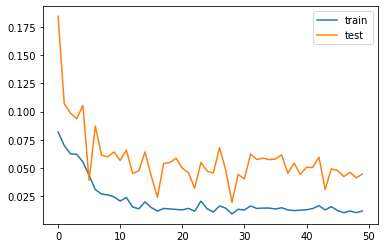

In [84]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [85]:
test_X.shape

(5184, 1, 49)

In [86]:
from pandas import concat
from sklearn.metrics import mean_squared_error
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.023


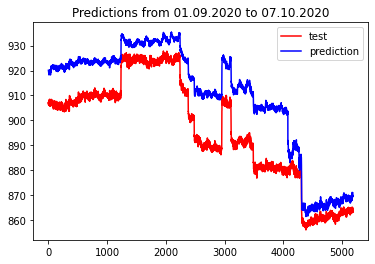

In [98]:
pyplot.plot(inv_y, color = 'red', label = 'test')
pyplot.plot(inv_yhat, color = 'blue', label = 'prediction')
pyplot.legend()
pyplot.title('Predictions from 01.09.2020 to 07.10.2020', color = 'black')
pyplot.show()